In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Build path to dataset
from pathlib import Path

project_root = Path().resolve().parent
dataset_path = project_root / "dataset" / "data.csv"

# Load the dataset
df = pd.read_csv(dataset_path)


In [ ]:
# Initial checks

print(f'shape = {df.shape}')
print()
print(df.info())
print()
print(df.describe(include="all"))

shape = (96, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   ID                                                                                            96 non-null     int64 
 1   IMAGE                                                                                         96 non-null     int64 
 2   How scary is this image?                                                                      96 non-null     int64 
 3   How likely are you to see something like this in  a dream?                                    96 non-null     object
 4   What is the dominant emotion of the image?                                                    93 non-null     object
 5   How realistic does t

In [16]:
# Missing data Analysis

# Count missing values per column
missing_count = df.isna().sum()

# Percentage
missing_percent = (missing_count / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage (%)": missing_percent
}).sort_values(by="Missing Percentage (%)", ascending=False)

missing_summary



,Missing Count,Missing Percentage (%)
Write a short story inspired by this image without naming any objects in it.,25,26.041667
"If you were asked to improve this image to make it “perfect”, how many edits would you make?",5,5.208333
What is the dominant emotion of the image?,3,3.125000
How scary is this image?,0,0.000000
IMAGE,0,0.000000
ID,0,0.000000
How likely are you to see something like this in a dream?,0,0.000000
How likely is this image AI-generated?,0,0.000000
How realistic does this image look?,0,0.000000
How much would you pay for this as a painting (in euros)?,0,0.000000


In [ ]:
# Create a shorter version of column names for visualization
short_cols = {
    "How scary is this image?": "Scary",
    "How likely are you to see something like this in  a dream?": "Dream Likely",
    "What is the dominant emotion of the image?": "Dominant Emotion",
    "How realistic does this image look?": "Realistic",
    "How likely is this image AI-generated?": "AI Likely",
    "How much would you pay for this as a painting (in euros)?": "Price (€)",
    "If you were asked to improve this image to make it “perfect”, how many edits would you make?": "Edits",
    "Write a short story inspired by this image without naming any objects in it.": "Short Story",
    "Does anything feel visually wrong/inconsistent in this image?": "Visual Issues"
}

# Rename for plotting
df_plot = df.rename(columns=short_cols)

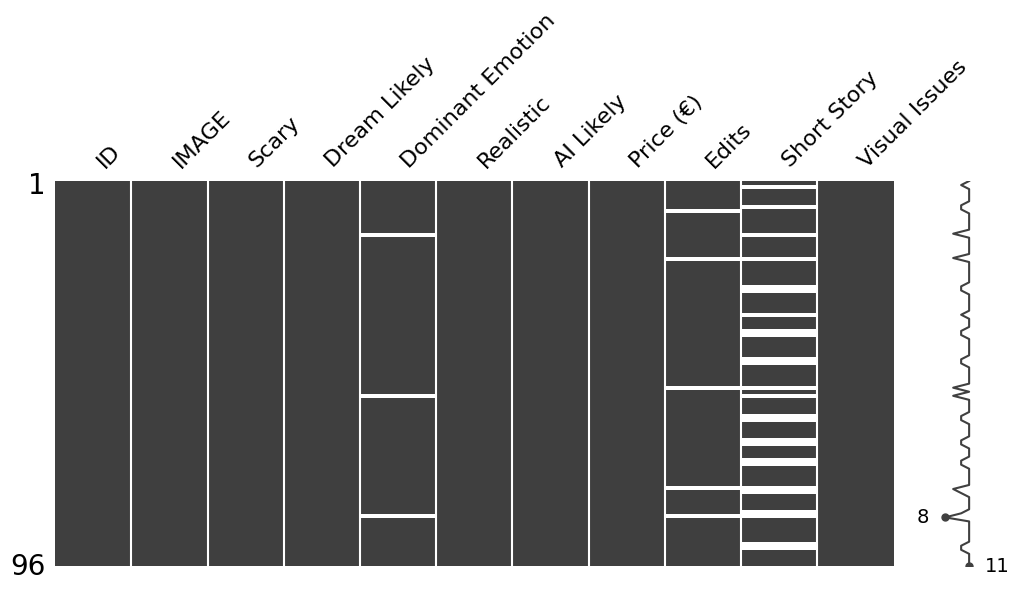

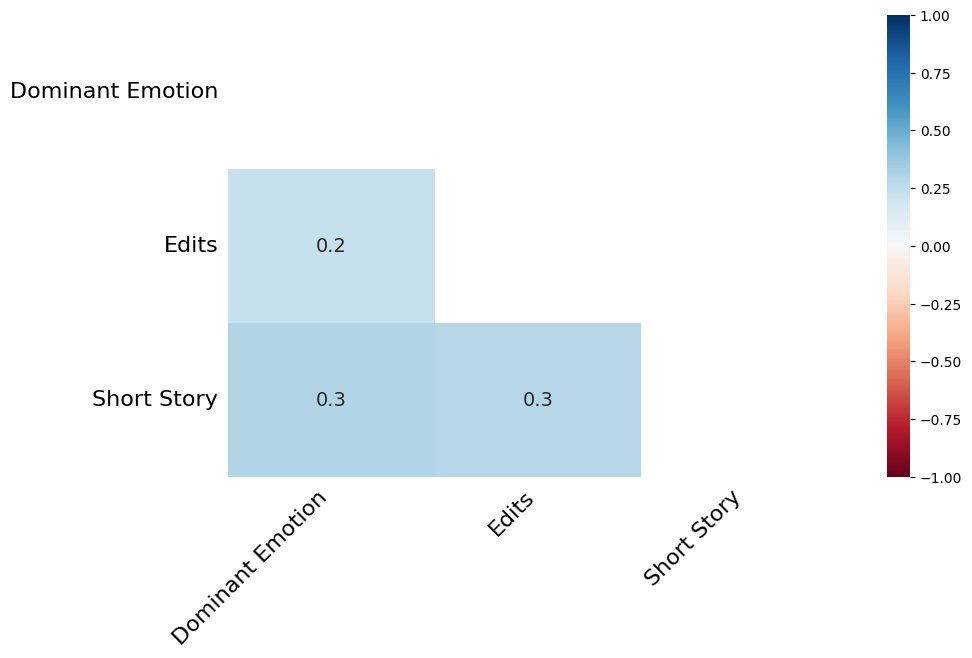

In [21]:
import missingno as msno

# Matrix
msno.matrix(df_plot, figsize=(12,5))
plt.show()

# Heatmap (correlation of missingness)
msno.heatmap(df_plot, figsize=(10,6))
plt.show()